In [1]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install autocorrect

Defaulting to user installation because normal site-packages is not writeable


# 1. Exploratory Data Analysis

## 1.1. Loading Python Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from autocorrect import Speller
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/siddh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/siddh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/siddh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 1.2. Loading Training and Test Datasets

In [5]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print("Number of data points in training data:", df_train.shape[0])
print("Number of data points in test data:", df_test.shape[0])

Number of data points in training data: 1306122
Number of data points in test data: 375806


In [6]:
df_train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


*Training dataset contains columns: qid, question_text and a target(binary value). All observations are unique with non null values.*

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [8]:
# Checking for null values.

df_train['question_text'].isnull().sum(), df_test['question_text'].isnull().sum() 

(0, 0)

## 1.3. Distribution of Data Points

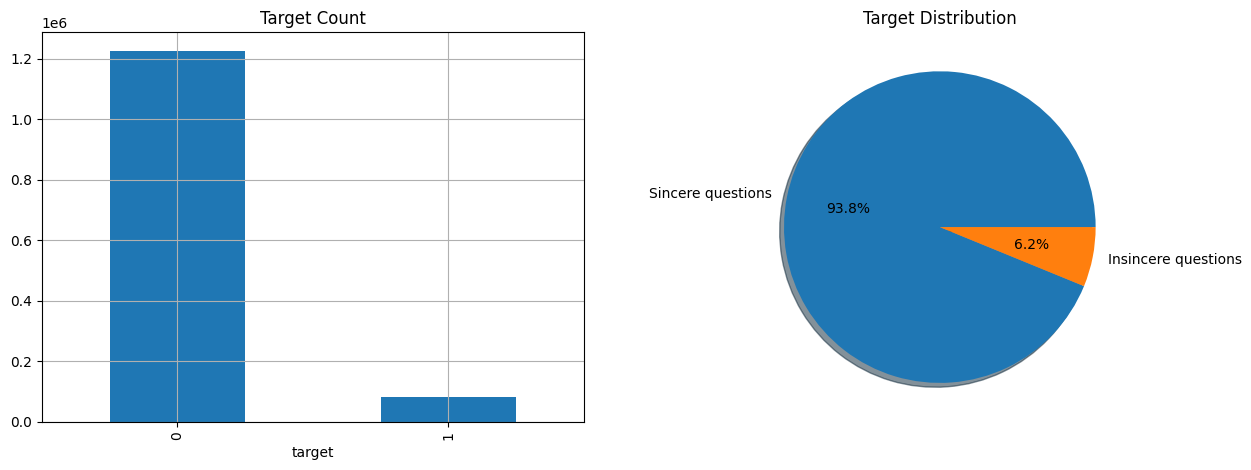

In [9]:
# Bar chart
plt.subplot(1, 2, 1)
df_train.groupby('target')['qid'].count().plot.bar()
plt.grid(True)
plt.title('Target Count')
plt.subplots_adjust(right=1.9)

# Pie Chart
plt.subplot(1, 2, 2)
values = [df_train[df_train['target']==0].shape[0], df_train[df_train['target']==1].shape[0]]
labels = ['Sincere questions', 'Insincere questions']

plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Target Distribution')
plt.tight_layout()
plt.subplots_adjust(right=1.9)
plt.show()



* *Dataset is highly imbalanced with only 6.2% of insincere questions.*
* *F1-Score seems to be right choice than accuracy here because of data imbalance.*



## 1.4. Word Cloud for both Sincere and Insincere Questions

In [10]:
# Separate sincere and insincere questions
sincere_questions = df_train[df_train['target'] == 0]['question_text']
insincere_questions = df_train[df_train['target'] == 1]['question_text']

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

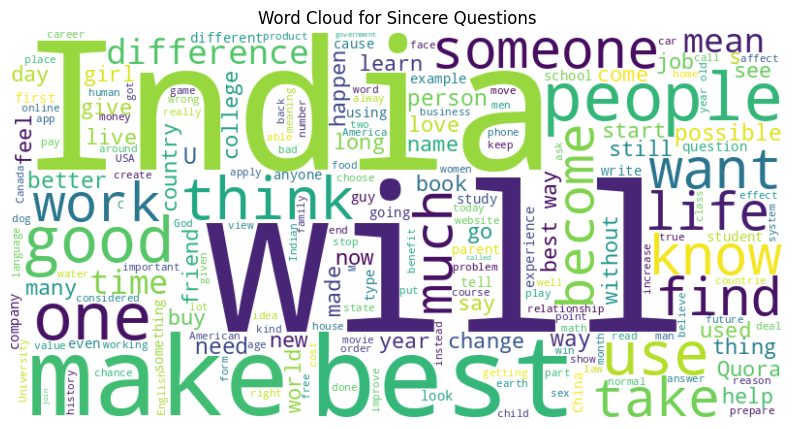

In [11]:
# Generate word cloud for sincere questions
generate_wordcloud(sincere_questions, "Word Cloud for Sincere Questions")

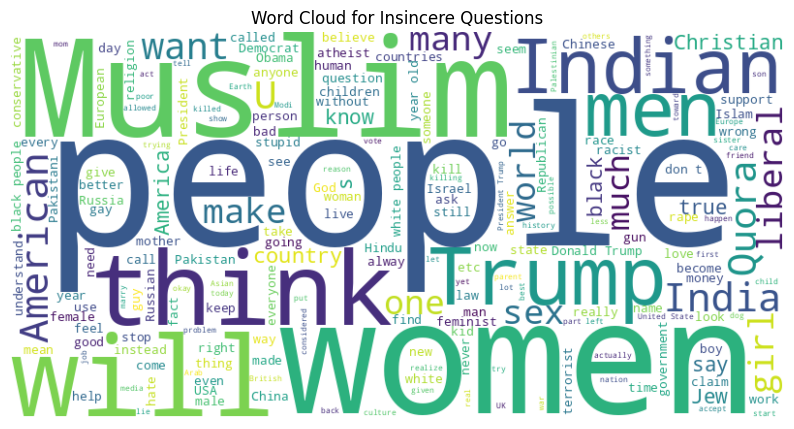

In [12]:
# Generate word cloud for insincere questions
generate_wordcloud(insincere_questions, "Word Cloud for Insincere Questions")

* *As we can see insincere questions contain many of the offensive words.*

* *Most of the insincere questions in the provided training set are related to People, Muslim, Women, Trump, etc.*

## 1.5. Top Words in Sincere & Insincere Questions (Unigrams, Bigrams & Trigrams)

In [14]:
def plot_word_freq(data, title, bar_color):
    
  top_words = Counter(data).most_common(25) #top 25 words

  df_top = pd.DataFrame(top_words, columns=['word', 'count']).sort_values('count') # storing in df

  plt.barh(df_top['word'].values, df_top['count'].values, orientation='horizontal', color=bar_color) # plot
  plt.title(f'Top words in {title}')

In [15]:
def get_unigrams(data):
  unigrams = []
  for sent in data:
    unigrams.extend([w for w in sent.lower().split() if w not in STOPWORDS])
  return unigrams

def get_bigrams(data):
  bigrams = []
  for sent in data:
    sent = [w for w in sent.lower().split() if w not in STOPWORDS]
    bi = [b for b in nltk.bigrams(sent)]
    bi = [' '.join(w) for w in bi]
    bigrams.extend(bi)
  return bigrams
    
def get_trigrams(data):
  trigrams = []
  for sent in data:
    sent = [w for w in sent.lower().split() if w not in STOPWORDS]
    ti = [t for t in nltk.trigrams(sent)]
    ti = [' '.join(w) for w in ti]
    trigrams.extend(ti)
  return trigrams

In [16]:
# Unigrams
unigrams_sincere  = get_unigrams(df_train[df_train['target']==0]['question_text'])
unigrams_insincere = get_unigrams(df_train[df_train['target']==1]['question_text'])

# Bigrams
bigrams_sincere = get_bigrams(df_train[df_train['target']==0]['question_text'])
bigrams_insincere = get_bigrams(df_train[df_train['target']==1]['question_text'])

# Trigrams
trigrams_sincere = get_trigrams(df_train[df_train['target']==0]['question_text'])
trigrams_insincere = get_trigrams(df_train[df_train['target']==1]['question_text'])

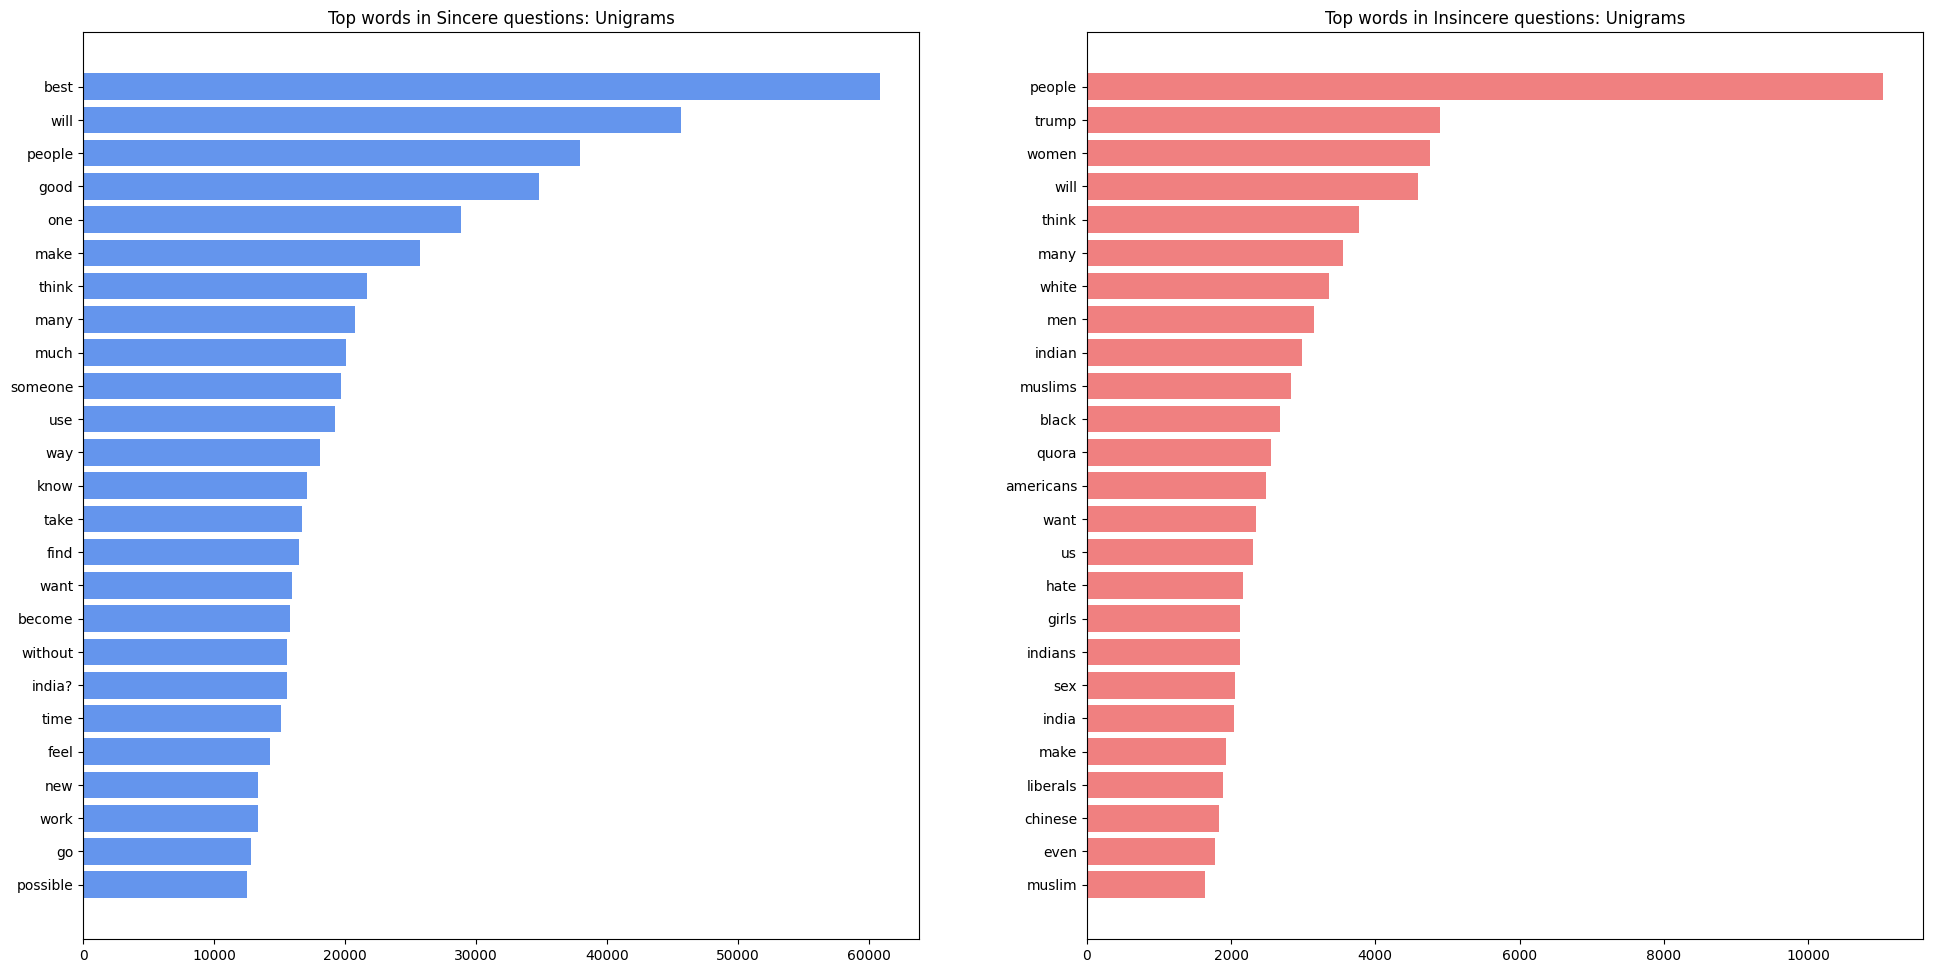

In [17]:
# Unigrams Sincere words
plt.subplot(1, 2, 1)
plot_word_freq(unigrams_sincere, 'Sincere questions: Unigrams', 'cornflowerblue')

# Unigrams Insincere words
plt.subplot(1, 2, 2)
plot_word_freq(unigrams_insincere, 'Insincere questions: Unigrams', 'lightcoral')
plt.subplots_adjust(right=3.0)
plt.subplots_adjust(top=2.0)
plt.show()

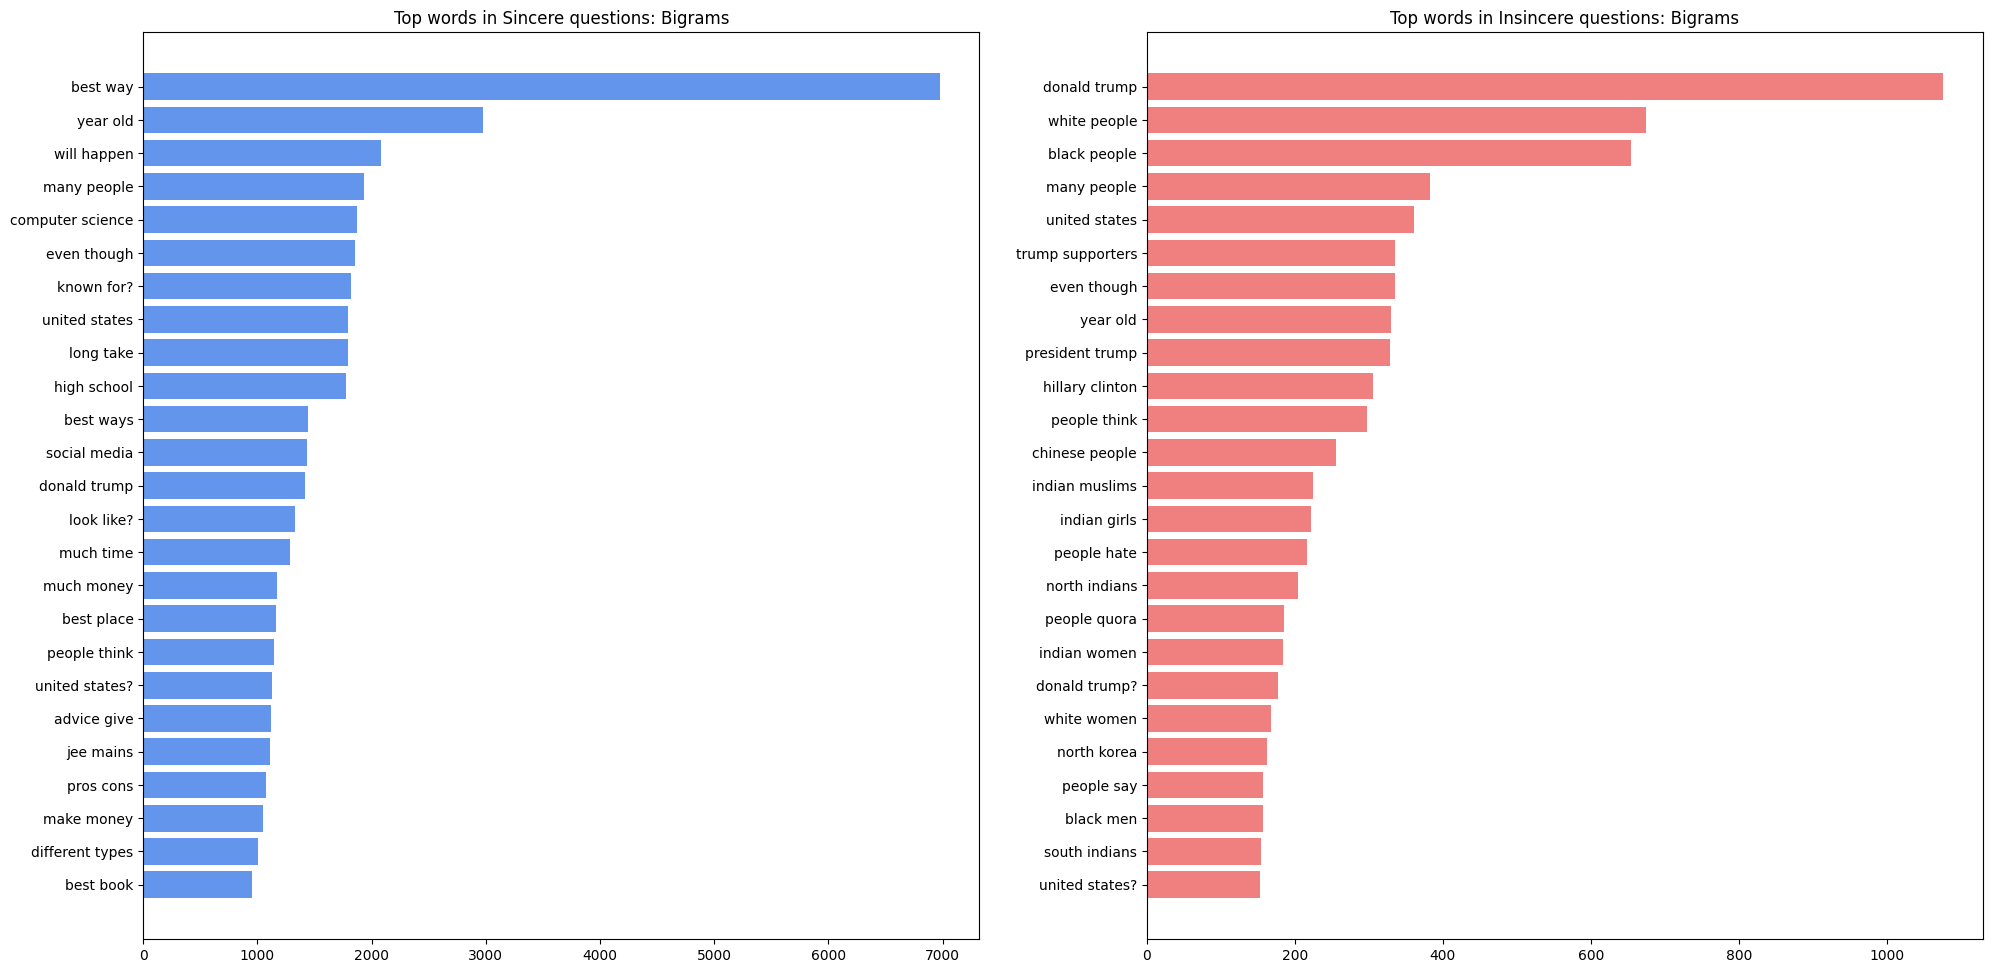

In [18]:
# Bigrams Sincere words
plt.subplot(1, 2, 1)
plot_word_freq(bigrams_sincere, 'Sincere questions: Bigrams', 'cornflowerblue')

# Bigrams Insincere words
plt.subplot(1, 2, 2)
plot_word_freq(bigrams_insincere, 'Insincere questions: Bigrams', 'lightcoral')
plt.subplots_adjust(right=3.0)
plt.subplots_adjust(top=2.0)
plt.show()

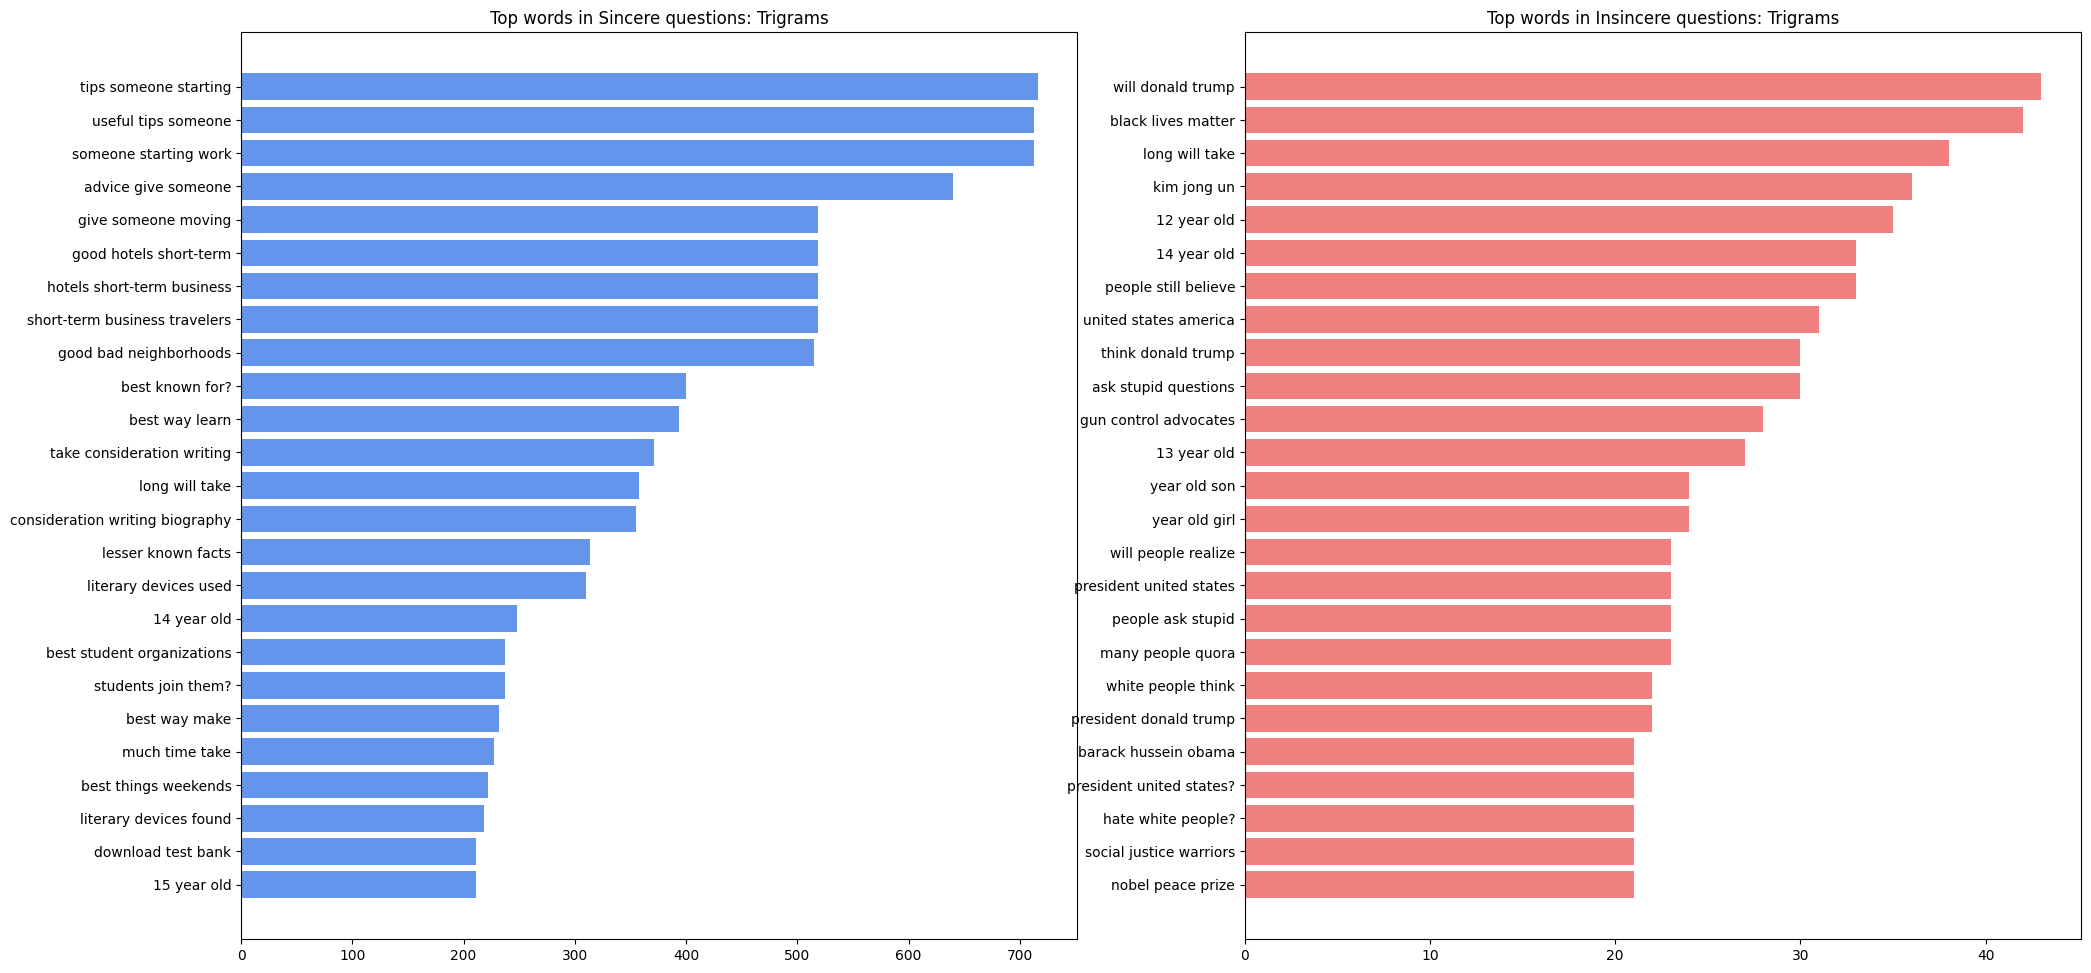

In [19]:
# Trigrams Sincere words
plt.subplot(1, 2, 1)
plot_word_freq(trigrams_sincere, 'Sincere questions: Trigrams', 'cornflowerblue')

# Trigrams Insincere words
plt.subplot(1, 2, 2)
plot_word_freq(trigrams_insincere, 'Insincere questions: Trigrams', 'lightcoral')
plt.subplots_adjust(right=3.0)
plt.subplots_adjust(top=2.0)
plt.show()

## 1.6. Feature Extraction

In [20]:
# Number of words
df_train['num_words'] = df_train['question_text'].apply(lambda x: len(str(x).split()))
df_test['num_words'] = df_test['question_text'].apply(lambda x: len(str(x).split()))

# Number of capital_letters
df_train['num_capital_let'] = df_train['question_text'].apply(lambda x: len([c for c in str(x) if c.isupper()]))
df_test['num_capital_let'] = df_test['question_text'].apply(lambda x: len([c for c in str(x) if c.isupper()]))

# Number of special characters
df_train['num_special_char'] = df_train['question_text'].str.findall(r'[^a-zA-Z0-9 ]').str.len()
df_test['num_special_char'] = df_test['question_text'].str.findall(r'[^a-zA-Z0-9 ]').str.len()

# Number of unique words
df_train['num_unique_words'] = df_train['question_text'].apply(lambda x: len(set(str(x).split())))
df_test['num_unique_words'] = df_test['question_text'].apply(lambda x: len(set(str(x).split())))

# Number of numerics
df_train['num_numerics'] = df_train['question_text'].apply(lambda x: sum(c.isdigit() for c in x))
df_test['num_numerics'] = df_test['question_text'].apply(lambda x: sum(c.isdigit() for c in x))

# Number of characters
df_train['num_char'] = df_train['question_text'].apply(lambda x: len(str(x)))
df_test['num_char'] = df_test['question_text'].apply(lambda x: len(str(x)))

# Number of stopwords
df_train['num_stopwords'] = df_train['question_text'].apply(lambda x: len([c for c in str(x).lower().split() if c in STOPWORDS]))
df_test['num_stopwords'] = df_test['question_text'].apply(lambda x: len([c for c in str(x).lower().split() if c in STOPWORDS]))

df_train.head()

,qid,question_text,target,num_words,num_capital_let,num_special_char,num_unique_words,num_numerics,num_char,num_stopwords
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,13,2,1,13,4,72,7
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,16,1,2,15,0,81,10
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,10,2,2,8,0,67,3
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,9,4,1,9,0,57,3
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,15,3,1,15,0,77,7


## 1.7. Analysis on Extracted Features

In [22]:
print("Minimum length of a question:", min(df_train['num_words']))
print("Maximum length of a question:", max(df_train['num_words']))

Minimum length of a question: 1
Maximum length of a question: 134


In [23]:
def display_boxplot(_x, _y, _data, _title):
    sns.boxplot(x=_x, y=_y, data=_data)
    plt.grid(True)
    plt.title(_title)

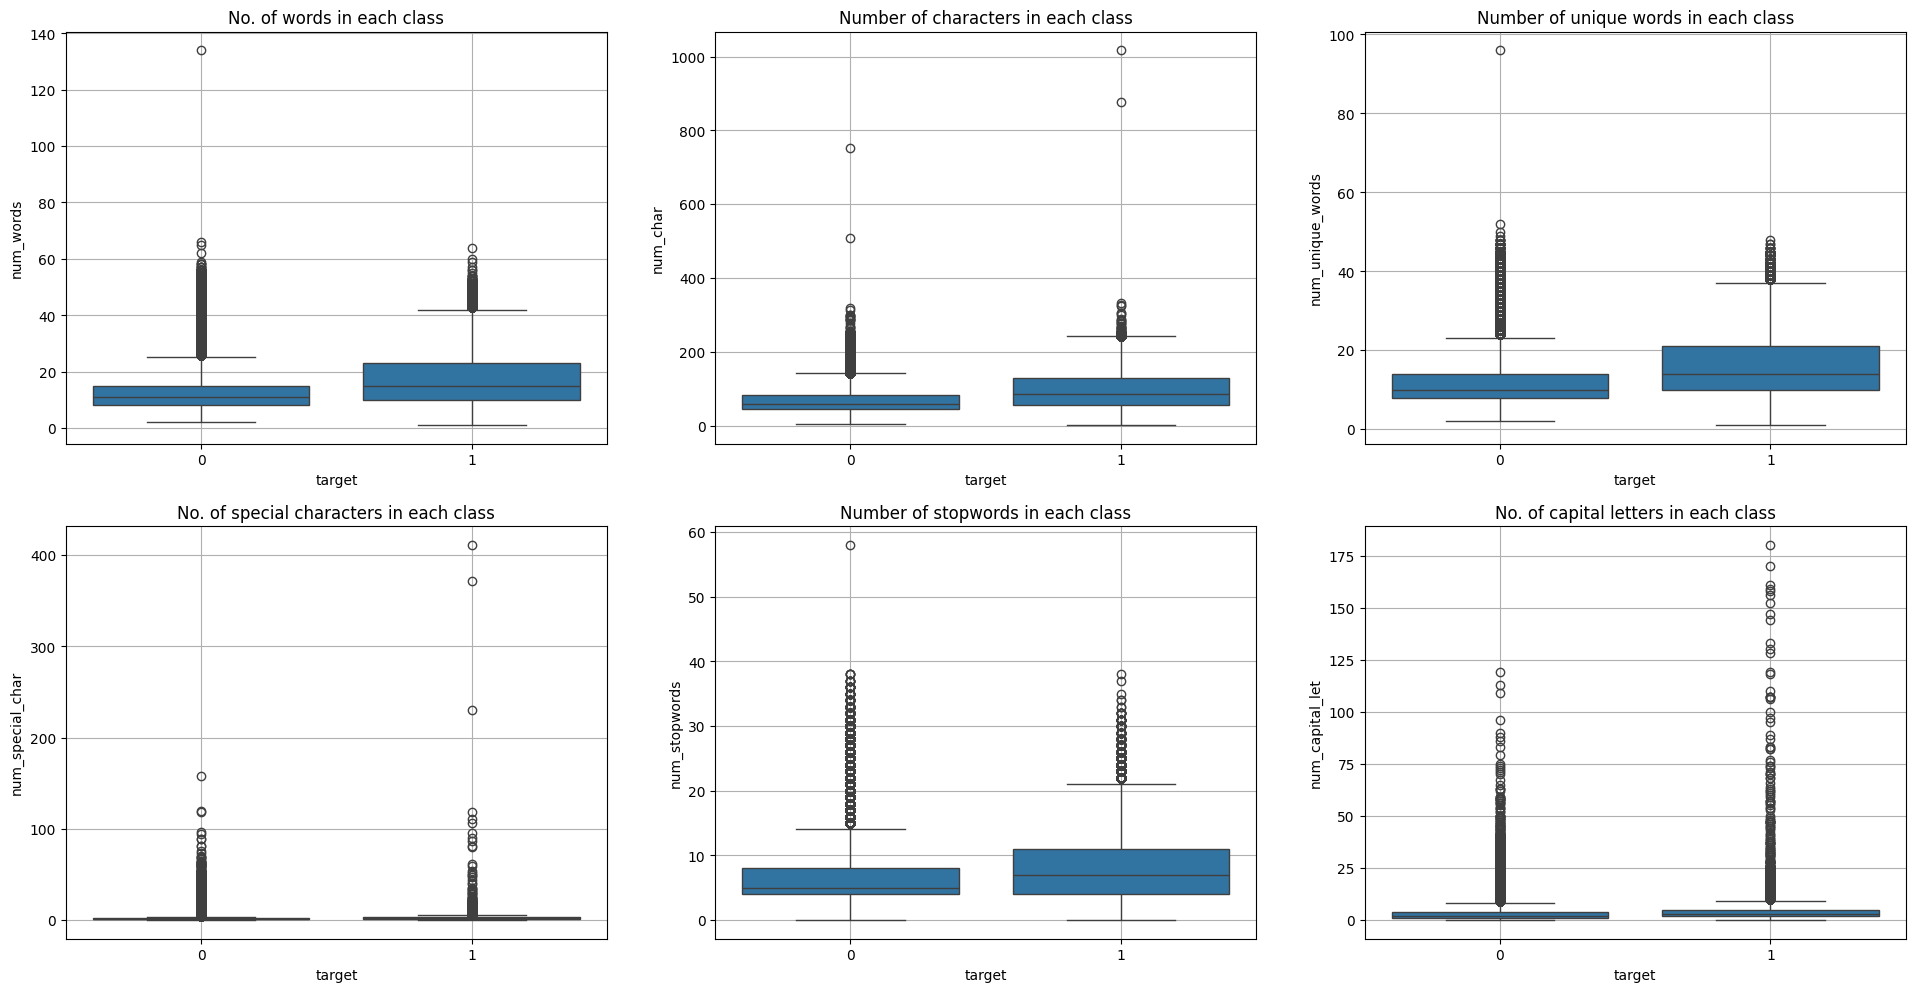

In [24]:
# Boxplot: Number of words
plt.subplot(2, 3, 1)
display_boxplot('target', 'num_words', df_train, 'No. of words in each class')

# Boxplot: Number of chars
plt.subplot(2, 3, 2)
display_boxplot('target', 'num_char', df_train, 'Number of characters in each class')

# Boxplot: Number of unique words
plt.subplot(2, 3, 3)
display_boxplot('target', 'num_unique_words', df_train, 'Number of unique words in each class')

# Boxplot: Number of special characters
plt.subplot(2, 3, 4)
display_boxplot('target', 'num_special_char', df_train, 'No. of special characters in each class')

# Boxplot: Number of stopwords
plt.subplot(2, 3, 5)
display_boxplot('target', 'num_stopwords', df_train, 'Number of stopwords in each class')

# Boxplot: Number of capital letters
plt.subplot(2, 3, 6)
display_boxplot('target', 'num_capital_let', df_train, 'No. of capital letters in each class')


plt.subplots_adjust(right=3.0)
plt.subplots_adjust(top=2.0)
plt.show()

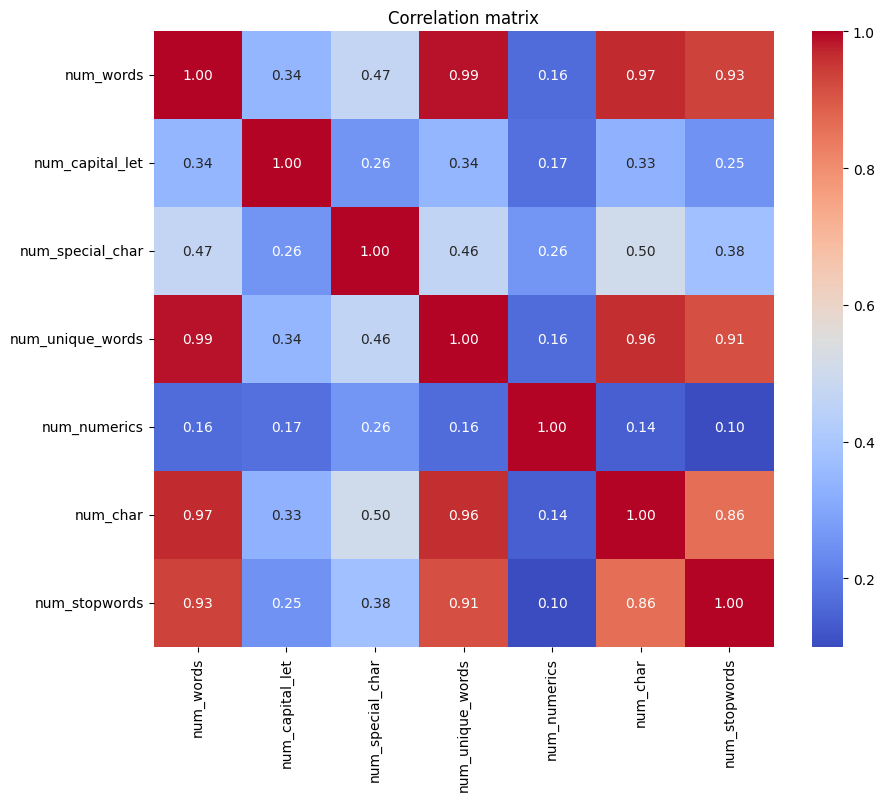

In [28]:
# Correlation matrix
corr = df_train[['num_words', 'num_capital_let', 'num_special_char', 
                 'num_unique_words', 'num_numerics', 'num_char', 
                 'num_stopwords']].corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.show()



* *Insincere questions seems to have more words and characters.*
* *Insincere questions also have more unique words compared to sincere questions.*



In [29]:
# Questions with most number of non-alphanumeric characters.
# Insincere questions are printed in red color.

qids = df_train.sort_values('num_special_char', ascending=False)['qid'].head(20).values
for id in qids:
  row = df_train[df_train['qid'].values == id]
  if row['target'].values[0] == 1: 
    color = '\033[31m'
  else:
    color = '\033[0m'
  print(color, row['question_text'].values[0], '\n')

 What is [math]\frac{\int_{1x^5}^{3x^{-5}} \tan(\tan({\boxed{\int_{1x^0}^{1x^2} \sum_{\varpi=1}^{\infty} \int_{2x^{-3}}^{2x^2} \sum_{\alpha=7}^{\infty} \underbrace{\sqrt[2]{1x^5}}_{\text{Gauss's Law of Theoretical Probability.}} d\tau dx}}^{1x^0})) d\mu}{\int_{2x^{-3}}^{1x^5} \cos(\int_{2x^2}^{1x^{-3}} \frac{\sqrt[2]{\overbrace{\underbrace{\frac{3x^3+3x^5}{\sqrt[3]{2x^{-3}}}}_{\text{Gauss's Law of Theoretical Probability.}} \times \overbrace{\tan(2x^0)}^{\text{Gauss's Law of Theoretical Probability.}}-\sum_{4=7}^{\infty} \boxed{3x^{-5}}}^{\text{Inverse Function.}}}}{{\boxed{\int_{2x^2}^{2x^4} 3x^1 d9} \div \sum_{6=6}^{\infty} \sqrt[3]{2x^2}+\sqrt[4]{\sin(2x^0+3x^0)}}^{2x^{-4}}+\boxed{\frac{\vec{\boxed{\sum_{\gamma=10}^{\infty} 1x^{-5}}}}{\frac{\sum_{\iota=2}^{\infty} 1x^{-5}-\frac{3x^{-1}}{1x^{-4}}}{\sin(\tan(3x^{-2}))}}}} \times \boxed{\sqrt[2]{{{{\sqrt[5]{2x^5}}^{2x^{-1}}}^{2x^{-1}} \div \sum_{\chi=6}^{\infty} \int_{1x^4}^{2x^{-4}} 3x^2 d\vartheta+{2x^{-3}}^{2x^{-5}}}^{3x^{-4}}}} d\m

In [31]:
# Special symbols

def get_all_symbols(data):
  symbols = []
  for text in data:
    s = re.findall(r'\W+', str(text))
    symbols.extend(s), 
  
  return set(symbols)

In [32]:
extracted_symbols = get_all_symbols(df_train['question_text'].values)
print(extracted_symbols)

{',∆', '= [(', ' $$ ', '}(', '].', '.)', '″ ', '-:', '+)-->?', '})},\\, |', ']?', ')}{', '%+/- ', " …' ", '" .', '...)^', ', == ', ' (:-', '-}}\\', ' √¡ +√-¡?', ')= ', ' § ', ' ... (', ')?)', ')}{\\', '\u200b? ', '}}}{', ';)', "'?", '***?', ' (+$', '*?', '़/', '++&', '$, ', "? ' ", '# ', '+{\\', ' :-)', '" \\', '∈ [', ')] /', '---, ', '++ ?', ' $$?', 'े', ')) ,', '++: ', '}-(', '़ि", ', '்)- ', ' → (', " ' (", '.: "', '? [ ', ', ∆', '=>', ' (’ ', " ', ", ' < ', '? “', ')), (', ':^', ') . ', ')] ', " '===' ", '}}}^{\\', '++.)', ') + {', " = '", ' = (?) ^', '}\\{\\', "' = ", ',<', '>?', ' {(\\', '!) = \\', ' ??)', '\\} ^ {\\', ' {-', '))=', ' === ', ' ☺️?', ')} \\', '? (# ', '? ⚧', ' ()?', '=? ', ' (…', '!" ', ' "¿?" ', ', #', '^', '/) ', ' } \\', '#)?', '{|\\', ' $$', '…, ', ' + √ ', ' ;)?', ' \\| ^{', ' + $', '\\ = \\ {', '! .?', ' *" ', ' "|', 'ំ', '}} +', 'े ?"', '}) \\', '!”, ', ')} /{(√', '],', ' $@?', " <'?", ' ✅ ', '\\; ', ' - -', ' =< (', ') = (\\', '.)"?', ' >>', "' “", '? ', '

* Looks like there are some math questions classified as insincere.
* Some questions also contains emojis and non-english characters.